In [100]:
# Import des bibliotheque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [101]:
class Perceptron:
    # Attributs de classe
    def __init__(self, learning_rate,n_iter):
        self.weight = None 
        self.bias = None
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
    # Fonction d'activation
    def activation(self, z):
        return np.heaviside(z, 0) # fonction heaviside
    
    # Fonction d'entrainement
    def fit(self, X, t):
        n_features = X.shape[1] # = nombre de columns de X
        
        # Iself.weight = None 
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # On itere jusqu'a n_iter
        for i in range(self.n_iter):
            # On parcours toutues les données d'entrainement
            for i in range(len(X[:,0])):
                z = np.dot(X, self.weights) + self.bias # = fonction d'agregation (w1x1 + w2x2 + w0)
                y_pred = self.activation(z) # fonction d'activation a laquelle on fournit la somme ponderer des entres
                
                #MaJ des poids eu du biais
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i] * X[i,:])
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
        
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [102]:
df = pd.read_excel("/home/jokos29/Téléchargements/height_weight.xlsx")
df.head(15)

,Taille (m),Poids (kg),Sexe
0,1.80,75,1
1,1.85,82,1
2,1.82,69,1
3,1.88,85,1
4,1.90,92,1
5,1.65,58,0
6,1.70,64,0
7,1.72,65,0
8,1.70,50,0
9,1.68,58,0


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = np.array(df.iloc[:, 0:2])
X = scaler.fit_transform(X)

y = np.array(df.iloc[:, 2])
print(X.shape)
print(y.shape)

(10, 2)
(10,)


In [106]:
perceptron = Perceptron(0.005, 10000) # creation d'une instance de la classe Perceptron 
perceptron.fit(X,y) # entrainement de l'instance 
pred = perceptron.predict(X) # prediction
score = accuracy_score(pred, y) # calcul du coefficient R2
print(score)
print(y)
print(pred)

1.0
[1 1 1 1 1 0 0 0 0 0]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


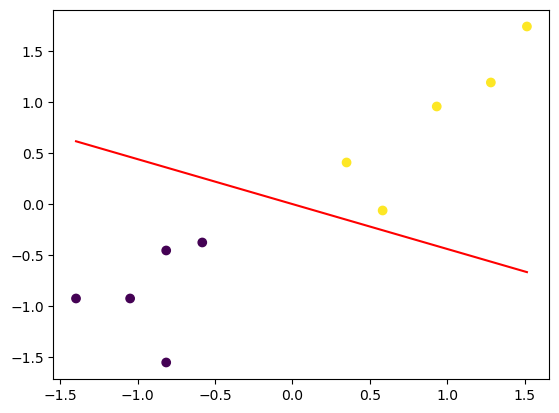

In [107]:
plt.figure()

# Nuage de points
plt.scatter(X[:,0], X[:,1], c= y)
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
x2 = (-1/perceptron.weights[1]) * (perceptron.weights[0] * x1 + perceptron.bias)
plt.plot(x1, x2, c= "red")
plt.show()